In [12]:
!pip install tensorflow keras matplotlib numpy pandas opencv-python


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os


In [16]:
dataset_dir = r'C:\Users\ASUS\OneDrive\Desktop\PlantVillage'


In [18]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% train, 20% validation
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',  # multi-class
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


In [20]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer = number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,519,887 (24.87 MB)

 Trainable params: 6,519,887 (24.87 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Save the best model based on validation accuracy
checkpoint = ModelCheckpoint('plant_disease_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,  # Start with 10–15 epochs; increase later if needed
    callbacks=[checkpoint]
)


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.3210 - loss: 2.1060
Epoch 1: val_accuracy improved from -inf to 0.68001, saving model to plant_disease_model.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 1716s 3s/step - accuracy: 0.3213 - loss: 2.1051 - val_accuracy: 0.6800 - val_loss: 0.9399
Epoch 2/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.6648 - loss: 1.0216
Epoch 2: val_accuracy improved from 0.68001 to 0.77632, saving model to plant_disease_model.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 197s 380ms/step - accuracy: 0.6648 - loss: 1.0214 - val_accuracy: 0.7763 - val_loss: 0.6565
Epoch 3/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.7365 - loss: 0.7878
Epoch 3: val_accuracy improved from 0.77632 to 0.81805, saving model to plant_disease_model.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 196s 380ms/step - accuracy: 0.7365 - loss: 0.7877 - val_accuracy: 0.8180 - val_loss: 0.5276
Epoch 4/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.7620 - loss: 0.7039
Epoch 4: val_accuracy improved from 0.81805 to 0.86269, saving model to plant_disease_model.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 190s 367ms/step - accuracy: 0.7621 - loss: 0.7038 - val_accuracy: 0.8627 - val_loss: 0.4109
Epoch 5/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.8035 - loss: 0.5760
Epoch 5: val_accuracy did not improve from 0.86269
517/517 ━━━━━━━━━━━━━━━━━━━━ 204s 371ms/step - accuracy: 0.8035 - loss: 0.5760 - val_accuracy: 0.8341 - val_loss: 0.4781
Epoch 6/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.8247 - loss: 0.5154
Epoch 6: val_accuracy improved from 0.86269 to 0.88646, saving model to plant_disease_model.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 222s 429ms/step - accuracy: 0.8247 - loss: 0.5154 - val_accuracy: 0.8865 - val_loss: 0.3245
Epoch 7/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.8413 - loss: 0.4717
Epoch 7: val_accuracy did not improve from 0.88646
517/517 ━━━━━━━━━━━━━━━━━━━━ 207s 400ms/step - accuracy: 0.8413 - loss: 0.4717 - val_accuracy: 0.8649 - val_loss: 0.4260
Epoch 8/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.8550 - loss: 0.4304
Epoch 8: val_accuracy improved from 0.88646 to 0.91000, saving model to plant_disease_model.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 197s 380ms/step - accuracy: 0.8550 - loss: 0.4304 - val_accuracy: 0.9100 - val_loss: 0.2699
Epoch 9/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.8686 - loss: 0.3852
Epoch 9: val_accuracy improved from 0.91000 to 0.91145, saving model to plant_disease_model.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 198s 383ms/step - accuracy: 0.8685 - loss: 0.3852 - val_accuracy: 0.9115 - val_loss: 0.2651
Epoch 10/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.8831 - loss: 0.3599
Epoch 10: val_accuracy did not improve from 0.91145
517/517 ━━━━━━━━━━━━━━━━━━━━ 192s 372ms/step - accuracy: 0.8831 - loss: 0.3600 - val_accuracy: 0.9017 - val_loss: 0.2768
Epoch 11/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.8806 - loss: 0.3488
Epoch 11: val_accuracy improved from 0.91145 to 0.93571, saving model to plant_disease_model.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 186s 360ms/step - accuracy: 0.8806 - loss: 0.3488 - val_accuracy: 0.9357 - val_loss: 0.1916
Epoch 12/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.8909 - loss: 0.3270
Epoch 12: val_accuracy did not improve from 0.93571
517/517 ━━━━━━━━━━━━━━━━━━━━ 182s 352ms/step - accuracy: 0.8909 - loss: 0.3270 - val_accuracy: 0.9216 - val_loss: 0.2294
Epoch 13/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.8954 - loss: 0.3141
Epoch 13: val_accuracy did not improve from 0.93571
517/517 ━━━━━━━━━━━━━━━━━━━━ 180s 349ms/step - accuracy: 0.8954 - loss: 0.3141 - val_accuracy: 0.9279 - val_loss: 0.2055
Epoch 14/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.9028 - loss: 0.2825
Epoch 14: val_accuracy improved from 0.93571 to 0.93862, saving model to plant_disease_model.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 188s 363ms/step - accuracy: 0.9028 - loss: 0.2825 - val_accuracy: 0.9386 - val_loss: 0.1962
Epoch 15/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.9071 - loss: 0.2785
Epoch 15: val_accuracy did not improve from 0.93862
517/517 ━━━━━━━━━━━━━━━━━━━━ 180s 349ms/step - accuracy: 0.9071 - loss: 0.2785 - val_accuracy: 0.9289 - val_loss: 0.2080


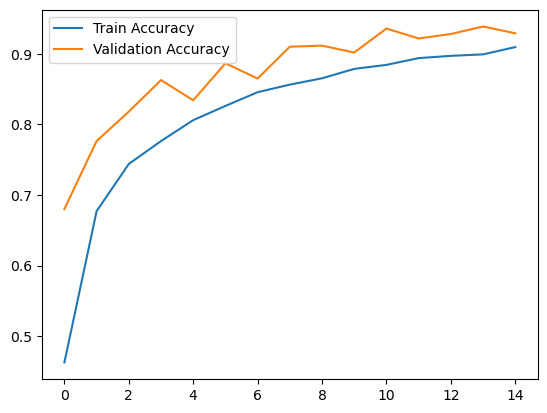

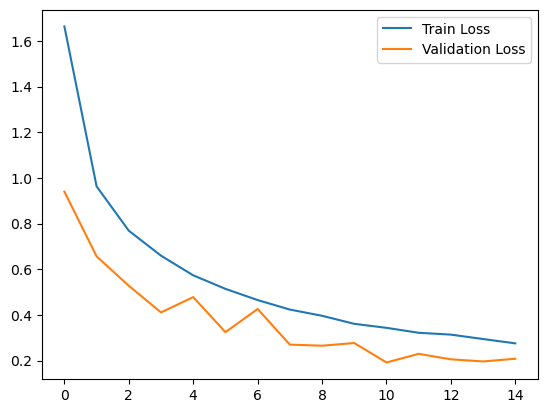

In [15]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [17]:
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)


129/129 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 0.9311 - loss: 0.1943
Validation Accuracy: 0.9274623990058899


In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))
base_model.trainable = False  # freeze pretrained layers

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,589,775 (9.88 MB)

 Trainable params: 331,791 (1.27 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [23]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)



Epoch 1/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 152s 289ms/step - accuracy: 0.6465 - loss: 1.1399 - val_accuracy: 0.8399 - val_loss: 0.4706
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 168s 324ms/step - accuracy: 0.8274 - loss: 0.5074 - val_accuracy: 0.8610 - val_loss: 0.4077
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 153s 296ms/step - accuracy: 0.8525 - loss: 0.4371 - val_accuracy: 0.8649 - val_loss: 0.3805
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 153s 296ms/step - accuracy: 0.8674 - loss: 0.3913 - val_accuracy: 0.8826 - val_loss: 0.3373
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 153s 296ms/step - accuracy: 0.8788 - loss: 0.3545 - val_accuracy: 0.8891 - val_loss: 0.3209
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 174s 336ms/step - accuracy: 0.8815 - loss: 0.3413 - val_accuracy: 0.9039 - val_loss: 0.2868
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 161s 311ms/step - accuracy: 0.8877 - loss: 0.3208 - val_accuracy: 0.8797 - val_loss: 0.3383
Epoch 8/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 167s 323ms/step - accuracy: 0.8806 -

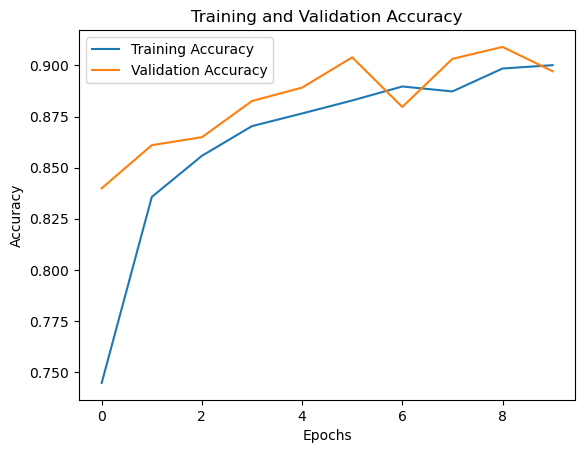

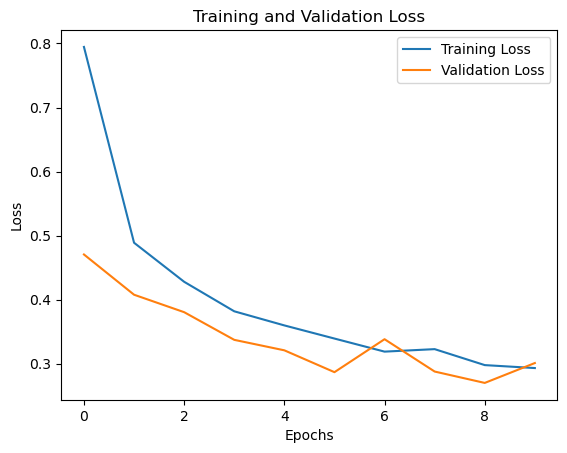

In [60]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [62]:
val_loss, val_acc = model.evaluate(val_generator)
print("Updated Validation Accuracy:", val_acc)

129/129 ━━━━━━━━━━━━━━━━━━━━ 44s 336ms/step - accuracy: 0.8936 - loss: 0.3164
Updated Validation Accuracy: 0.903930127620697


In [22]:
from tensorflow.keras.preprocessing import image
import numpy as np

# get class names from your training data generator
class_names = list(train_generator.class_indices.keys())

# give the path of the image you want to test
img_path = r'C:\Users\ASUS\OneDrive\Desktop\Newimage.JPG'

# load and preprocess the image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# make prediction
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]
print("Predicted Class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
Predicted Class: Tomato_Spider_mites_Two_spotted_spider_mite
